In [1]:
import sqlite3
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [3]:
 df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
df

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [4]:
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:

#top ratings based on the averagerating column

In [6]:
#df_all_cols = pd.concat([df, title_basics], axis = 1)
#df_all_cols

In [7]:
new_df = pd.read_sql('''
    SELECT DISTINCT tconst, imdb_title_basics.*
    FROM imdb_title_basics JOIN imdb_title_principals
    USING(tconst)''', conn)


In [8]:
new_df

,tconst,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...
143449,tt9916538,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
143450,tt9916622,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
143451,tt9916706,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
143452,tt9916730,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
df2 = new_df.drop("tconst", axis=1)
df2

,idx,primary_title,original_title,start_year,runtime_minutes,genres
0,0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
143449,146139,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
143450,146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
143451,146141,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
143452,146142,6 Gunn,6 Gunn,2017,116.0,None


In [10]:
df2.sort_values(by=['runtime_minutes'])

,idx,primary_title,original_title,start_year,runtime_minutes,genres
71503,72190,Powered By Green Smoothies,Powered By Green Smoothies,2014,1.0,"Adventure,Documentary,Sport"
97514,98755,Isa One Minute Portrait,Isa One Minute Portrait,2016,1.0,Documentary
111033,113278,First and Last,First and Last,2016,1.0,"Documentary,War"
114595,116943,"Warnings missed? The crop circle of May 21, 2017","Warnings missed? The crop circle of May 21, 2017",2017,1.0,"Documentary,Horror,Mystery"
137916,140571,For A Better Life,For A Better Life,2018,1.0,"Documentary,Family"
...,...,...,...,...,...,...
143441,146131,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
143448,146138,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
143450,146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
143451,146141,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [11]:
data = [df2["genres"], df2["runtime_minutes"], df2["primary_title"]]
headers = ["genres", "runtime_minutes", "primary_title"]
runtime = pd.concat(data, axis=1, keys=headers)
runtime

,genres,runtime_minutes,primary_title
0,"Action,Crime,Drama",175.0,Sunghursh
1,"Biography,Drama",114.0,One Day Before the Rainy Season
2,Drama,122.0,The Other Side of the Wind
3,"Comedy,Drama",NaN,Sabse Bada Sukh
4,"Comedy,Drama,Fantasy",80.0,The Wandering Soap Opera
...,...,...,...
143449,Drama,123.0,Kuambil Lagi Hatiku
143450,Documentary,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro
143451,Comedy,NaN,Dankyavar Danka
143452,None,116.0,6 Gunn


In [12]:
Drama = runtime.loc[runtime['genres'] == 'Drama']
Drama

,genres,runtime_minutes,primary_title
2,Drama,122.0,The Other Side of the Wind
10,Drama,136.0,Pál Adrienn
13,Drama,89.0,Children of the Green Dragon
17,Drama,104.0,Heaven & Hell
18,Drama,120.0,The Final Journey
...,...,...,...
143419,Drama,127.0,Ormma
143421,Drama,NaN,De Beentjes van Sint Hildegard
143423,Drama,130.0,Padmavyuhathile Abhimanyu
143445,Drama,51.0,The Rehearsal


In [13]:
Drama_median = Drama["runtime_minutes"].median()

In [14]:
Horror = runtime.loc[runtime['genres'] == 'Horror']

In [15]:
Horror_median = Horror["runtime_minutes"].median()

In [16]:
Action = runtime.loc[runtime['genres'] == 'Action']

In [17]:
Action_median = Action["runtime_minutes"].median()

In [18]:
Comedy = runtime.loc[runtime['genres'] == 'Comedy']

In [19]:
Comedy_median = Comedy["runtime_minutes"].median()

In [20]:
genre_runtime_median = {'Genre': ['Drama', 'Horror', 'Action', 'Comedy'],
                        'runtime_median': [92,85,93,91]
                        }
genre_runtime_avg = pd.DataFrame(genre_runtime_median, columns = ['Genre', 'runtime_median'])
genre_runtime_avg

,Genre,runtime_median
0,Drama,92
1,Horror,85
2,Action,93
3,Comedy,91


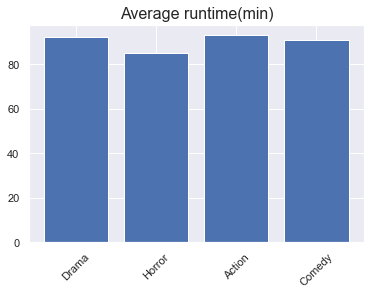

In [21]:
plt.bar(x=genre_runtime_median['Genre'],
 
        height=genre_runtime_median['runtime_median'])
color='midnightblue'
plt.xticks(rotation=45)
plt.title('Average runtime(min)', fontsize=16)
plt.savefig('Avg runtime bar graph')

In [22]:
#Filter the data to get only Drama, Horror, Action, Comedy

In [23]:
new_df4 = pd.read_sql('''SELECT *
FROM tn_movie_budgets
    INNER JOIN imdb_title_basics ON movie = primary_title;''',conn)


In [24]:
no_idx_4 = new_df4.drop("idx", axis=1)

In [25]:
no_tconst = no_idx_4.drop("tconst", axis=1)

In [26]:
values=['Drama','Horror', 'Action', 'Comedy']
df_genres = no_tconst[no_tconst.genres.isin(values)]
df_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,Abatâ,2011,93.0,Horror
63,77,"Jun 22, 2012",Brave,"$185,000,000","$237,282,182","$554,606,532",Brave,Brave,2014,NaN,Drama
85,98,"Jun 19, 2015",Inside Out,"$175,000,000","$356,461,711","$854,235,992",Inside Out,Inside Out,2011,NaN,Drama
95,2,"Nov 22, 2017",Coco,"$175,000,000","$209,726,015","$798,008,101",Coco,Coco,2017,98.0,Horror
162,3,"Apr 8, 2005",Sahara,"$145,000,000","$68,671,925","$121,671,925",Sahara,Sahara,2015,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...
3793,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",Emily,Emily,2017,83.0,Drama
3797,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",Exeter,Exeter,2014,NaN,Horror
3799,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,Ten,Ten,2013,118.0,Drama
3807,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama


In [27]:
#get production budget and worldwide gross averages for each genre and put on the bar graph with runtime

In [28]:
data2 = [df_genres["movie"], df_genres["production_budget"], df_genres["worldwide_gross"], df_genres["genres"]]
headers = ["movie", "production_budget", "worldwide_gross", "genres"]
genre_budget = pd.concat(data2, axis=1, keys=headers)
genre_budget

,movie,production_budget,worldwide_gross,genres
0,Avatar,"$425,000,000","$2,776,345,279",Horror
63,Brave,"$185,000,000","$554,606,532",Drama
85,Inside Out,"$175,000,000","$854,235,992",Drama
95,Coco,"$175,000,000","$798,008,101",Horror
162,Sahara,"$145,000,000","$121,671,925",Drama
...,...,...,...,...
3793,Emily,"$27,000","$3,547",Drama
3797,Exeter,"$25,000","$489,792",Horror
3799,Ten,"$25,000",$0,Drama
3807,Stories of Our Lives,"$15,000",$0,Drama


In [29]:
#remove $)
no_dollar_sign = genre_budget['production_budget'].str.replace('$', '').str.replace(',', '')
df3 = pd.DataFrame(no_dollar_sign)
df3

<ipython-input-29-94d34a852c02>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  no_dollar_sign = genre_budget['production_budget'].str.replace('$', '').str.replace(',', '')


,production_budget
0,425000000
63,185000000
85,175000000
95,175000000
162,145000000
...,...
3793,27000
3797,25000
3799,25000
3807,15000


In [30]:
no_dollar_sign2 = genre_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '')
df5 = pd.DataFrame(no_dollar_sign2)
df5

<ipython-input-30-6b80a8620c95>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  no_dollar_sign2 = genre_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '')


,worldwide_gross
0,2776345279
63,554606532
85,854235992
95,798008101
162,121671925
...,...
3793,3547
3797,489792
3799,0
3807,0


In [31]:
df13 = pd.concat([no_dollar_sign, no_dollar_sign2], axis=1)
df13

,production_budget,worldwide_gross
0,425000000,2776345279
63,185000000,554606532
85,175000000,854235992
95,175000000,798008101
162,145000000,121671925
...,...,...
3793,27000,3547
3797,25000,489792
3799,25000,0
3807,15000,0


In [32]:
just_genre = genre_budget[['genres']]

In [33]:
just_movie = genre_budget[['movie']]

In [34]:
df14 = pd.concat([df13, just_genre], axis=1)

In [35]:
df15 = pd.concat([df14, just_movie ], axis=1)
df15

,production_budget,worldwide_gross,genres,movie
0,425000000,2776345279,Horror,Avatar
63,185000000,554606532,Drama,Brave
85,175000000,854235992,Drama,Inside Out
95,175000000,798008101,Horror,Coco
162,145000000,121671925,Drama,Sahara
...,...,...,...,...
3793,27000,3547,Drama,Emily
3797,25000,489792,Horror,Exeter
3799,25000,0,Drama,Ten
3807,15000,0,Drama,Stories of Our Lives


In [36]:
#Shows movie, production_budget, worldwide_gross, and genres for Horror movies
Horror_2 = df15.loc[df15['genres'] == 'Horror']

In [37]:
#Finds median of production_budget for horror movies
Horror_production_budget_median = Horror_2["production_budget"].median()
Horror_production_budget_median

9900000.0

In [38]:
#Shows movie, production_budget, worlwide_gross, and genres for Drama movies
Drama_2 = df15.loc[df15['genres'] == 'Drama']

In [39]:
Drama_production_budget_median = Drama_2["production_budget"].median()
Drama_production_budget_median

12000000.0

In [40]:
#Shows movie, production_budget, worlwide_gross, and genres for Action movies
Action_2 = df15.loc[df15['genres'] == 'Action']

In [41]:
Action_production_budget_median = Action_2["production_budget"].median()
Action_production_budget_median

24500000.0

In [42]:
#Shows movie, production_budget, worlwide_gross, and genres for Comedy movies
Comedy_2 = df15.loc[df15['genres'] == 'Comedy']

In [43]:
Comedy_production_budget_median = Comedy_2["production_budget"].median()
Comedy_production_budget_median

20000000.0

In [44]:
#Table with Drama, Horror, Action, Comedy medians only production_budget
genere_production_budget_median = {'Genre': ['Drama', 'Horror', 'Action', 'Comedy'],
                                  'production_budget_median': [12000000,9900000,24500000,20000000]
                                  }
genre_production_budget_avg2 = pd.DataFrame(genere_production_budget_median, columns = ['Genre', 'production_budget_median'])
genre_production_budget_avg2

,Genre,production_budget_median
0,Drama,12000000
1,Horror,9900000
2,Action,24500000
3,Comedy,20000000


In [45]:
#Finds median of worldwide_gross for horror movies
Horror_worldwide_gross_median = Horror_2["worldwide_gross"].median()
Horror_worldwide_gross_median

14805812.0

In [46]:
#Finds median of worldwide_gross for Drama movies
Drama_worldwide_gross_median = Drama_2["worldwide_gross"].median()
Drama_worldwide_gross_median

11826980.0

In [47]:
#Finds median of worldwide_gross for Action movies
Action_worldwide_gross_median = Action_2["worldwide_gross"].median()
Action_worldwide_gross_median

29766753.5

In [48]:
#Finds median of worldwide_gross for Comedy movies
Comedy_worldwide_gross_median = Comedy_2["worldwide_gross"].median()
Comedy_worldwide_gross_median

28508010.0

In [49]:
##Table with Drama, Horror, Action, Comedy medians only for worlwide_gross
genre_worldwide_gross_median = {'Genre': ['Drama', 'Horror', 'Action', 'Comedy'],
                                 'worldwide_gross_median': [11826980,14805812,29766753,28508010]
                                }
genre_worldwide_gross_avg = pd.DataFrame(genre_worldwide_gross_median, columns = ['Genre', 'worldwide_gross_median'])
genre_worldwide_gross_avg

,Genre,worldwide_gross_median
0,Drama,11826980
1,Horror,14805812
2,Action,29766753
3,Comedy,28508010


In [50]:
#convert to data frame genere_worldwide_gross_avg
genre_worldwide_gross_avg_df = pd.DataFrame.from_dict(genre_worldwide_gross_avg)
genre_worldwide_gross_avg_df

,Genre,worldwide_gross_median
0,Drama,11826980
1,Horror,14805812
2,Action,29766753
3,Comedy,28508010


In [51]:
#covert to df genere_production_budget_avg2
genre_production_budget_avg_df = pd.DataFrame.from_dict(genre_production_budget_avg2)
genre_production_budget_avg_df

,Genre,production_budget_median
0,Drama,12000000
1,Horror,9900000
2,Action,24500000
3,Comedy,20000000


In [52]:
#combine genere_production_budget_avg2 and genere_worldwide_gross_avg

In [53]:
#budget_worldwide_gross_combined = pd.concat([genere_worldwide_gross_avg,genere_production_budget_avg2 ], ignore_index=True, sort=False)
genre_production_budget_avg_df['worldwide_gross_median'] = genre_worldwide_gross_avg_df['worldwide_gross_median']
budget_worldwide_gross_combined = genre_production_budget_avg_df
budget_worldwide_gross_combined

,Genre,production_budget_median,worldwide_gross_median
0,Drama,12000000,11826980
1,Horror,9900000,14805812
2,Action,24500000,29766753
3,Comedy,20000000,28508010


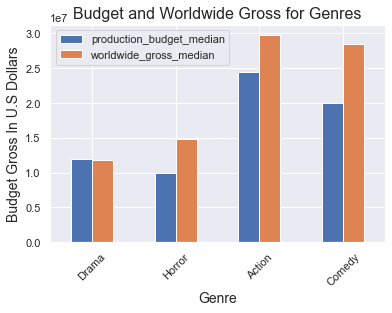

In [54]:
budget_worldwide_gross_combined.set_index('Genre').plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Budget Gross In U.S Dollars", size=14)
plt.xlabel("Genre", size=14)
plt.title("Budget and Worldwide Gross for Genres", size=16)
sns.set_palette("Dark2_r")
sns.set_style("dark")
plt.show()

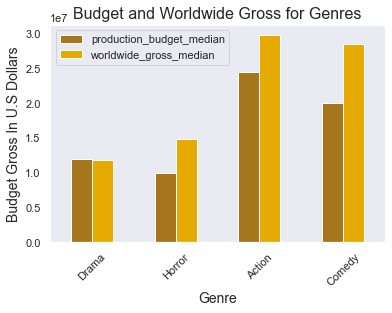

In [55]:
budget_worldwide_gross_combined.set_index('Genre').plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Budget Gross In U.S Dollars", size=14)
plt.xlabel("Genre", size=14)
plt.title("Budget and Worldwide Gross for Genres", size=16)
plt.show()